In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from matplotlib.pyplot import imshow
from PIL import Image
import cv2
from scipy import signal
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2

In [ ]:
img=cv2.imread("/flower.jpg",0)

In [ ]:
new_im =cv2.resize(img,(512,512))

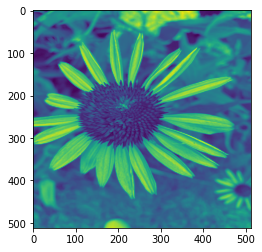

In [ ]:
imshow(new_im)

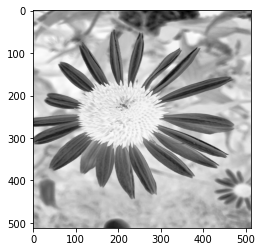

In [ ]:
imshow(new_im, cmap='Greys')

In [ ]:
#Fourier transform
f=np.fft.fft2(new_im)
fshift=np.fft.fftshift(f)

In [ ]:
fshift

array([[  29.          +0.j        ,  167.22910478 -50.25138523j,
        -162.43652621 +82.98821152j, ..., -186.92369936 +31.89432048j,
        -162.43652621 -82.98821152j,  167.22910478 +50.25138523j],
       [   3.77729209+201.75436764j,  242.52498899-252.64813357j,
         120.95350509+209.41388402j, ...,  323.54439823 +54.7394254j ,
        -237.06004228 +72.48847286j,  140.52348566+105.87117746j],
       [  86.98338995-138.91662105j, -332.38952058+195.52489783j,
        -236.40021622-192.15565881j, ..., -435.35744017 -41.62214908j,
          19.98372608+282.61942112j,  -21.05756175 -37.54027477j],
       ...,
       [  96.9421243 +175.02084072j,  -79.61240144 -65.4249514j ,
          -9.7961716 +198.29447331j, ...,  -53.94061508+277.95233194j,
        -501.57010987-230.61867436j,  134.17443879+264.75605993j],
       [  86.98338995+138.91662105j,  -21.05756175 +37.54027477j,
          19.98372608-282.61942112j, ...,   58.16487489-467.12914649j,
        -236.40021622+192.15565881j

In [ ]:
magnitude_spectrum=20*np.log(np.abs(fshift))

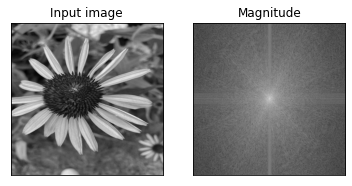

In [ ]:
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()



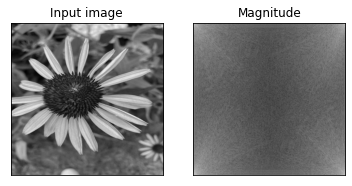

In [ ]:

#Inverse Fourier transform
f = np.fft.fft2(new_im)
fshift = np.fft.fftshift(f)
fshift=np.fft.ifftshift(fshift)
magnitude_spectrum=20*np.log(np.abs(fshift))
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
f = np.fft.fft2(new_im)
fshift = np.fft.fftshift(f)


In [ ]:
rows,cols, = new_im.shape
row_c,col_c = int(rows/3),int(cols/3)


In [ ]:
fshift[row_c-10:row_c+10, col_c-10:col_c+10] = 0

In [ ]:
# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

In [ ]:
# inverse fft to get the image back 
img_back = ifft2(f_ishift)
# take real part of the inverse FT


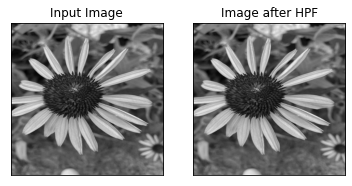

In [ ]:

plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), 
plt.xticks([]),
plt.yticks([]),
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
f = np.fft.fft2(new_im)

In [ ]:
fshift = np.fft.fftshift(f)

In [ ]:
rows, cols = new_im.shape
row_c,col_c = int(rows/2) , int(cols/2)

In [ ]:
# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)

#fshift[row_c-10:row_c+10, col_c-10:col_c+10] = 0

# We want to remove the low frequencies by masking with a rectangular window of size 20x20. Below is our solution: 
# 1. Apply the inverse shift using ifftshift() so that DC component again come at the top-left corner.
# 2. Find inverse FFT using ifft2() function. What would be the result of iFFT? 
# 3. Take its absolute value.

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

In [ ]:
# inverse fft to get the image back 
img_back = ifft2(f_ishift)

In [ ]:
img_back

array([[149., 148., 146., ..., 144., 146., 147.],
       [141., 140., 139., ..., 139., 140., 142.],
       [123., 123., 122., ..., 138., 139., 140.],
       ...,
       [ 98.,  98., 101., ..., 156., 156., 155.],
       [102., 102., 103., ..., 158., 160., 163.],
       [105., 103., 102., ..., 162., 163., 161.]])

In [ ]:
# take real part of the inverse FT
img_back = img_back.real

(Text(0.5, 1.0, 'Image without HPF'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

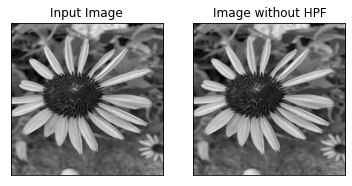

In [ ]:
plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image without HPF'), plt.xticks([]), plt.yticks([])

In [ ]:
im = Image.open("/flower.jpg")
np.shape(im) # -- We can see that this is RGB image
new_im=cv2.imread("/flower.jpg",0)
new_im=cv2.resize(new_im,(int(0.6* 512), 512)) # first is the width, second is height
f=np.fft.fft2(new_im)
fshift=np.fft.fftshift(f)
img_back = ifft2(fshift)
print('\nFT of "fox.jpg"\n', fshift)
print('\nFT of "fox.jpg" shifting to the center\n', fshift)
print('\nInverse of it\n', img_back)


FT of "fox.jpg"
 [[ -389.31378002-2.36058091e+02j   994.85417661+8.99472767e+02j
   -858.90318577-3.05655997e+02j ...  -858.90318577+3.05655997e+02j
    994.85417661-8.99472767e+02j  -389.31378002+2.36058091e+02j]
 [ 1012.7986403 +1.43528687e+02j -1349.09222038-5.47665187e+02j
    268.18985429-6.36375788e+01j ...   408.84830598-4.52429093e+02j
   -395.27147192+1.06918514e+03j  -228.07575504-3.38393073e+02j]
 [ -831.57003651+1.52367401e+02j   669.75309731-1.38344041e+02j
    541.2836176 +1.99176422e+01j ...   -20.78945469+9.76851418e+02j
   -325.90784452-1.12010335e+03j   150.99652868+4.99682870e+02j]
 ...
 [  -46.97117216-5.19655640e-01j   540.07200077-1.18327038e+03j
   -305.82823494+1.23727878e+03j ...  -474.65795994-8.11279523e+01j
   -146.67933567-3.64135110e+02j   669.26400261+7.51942855e+02j]
 [  150.99652868-4.99682870e+02j  -325.90784452+1.12010335e+03j
    -20.78945469-9.76851418e+02j ...   541.2836176 -1.99176422e+01j
    669.75309731+1.38344041e+02j  -831.57003651-1.5236740

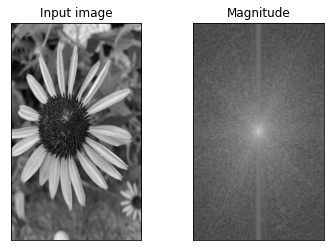

In [ ]:
magnitude_spectrum=20*np.log(np.abs(fshift))
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

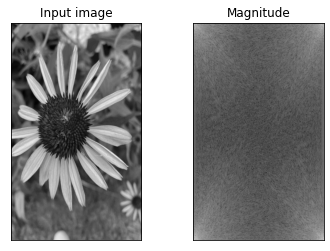

In [ ]:
# copy and paste a piece of code for visualization and state your observations on the relationship between the frequency components
# of the Fourier transform and image spatial characteristics. 
f = np.fft.fft2(new_im)
fshift = np.fft.fftshift(f)
fshift=np.fft.ifftshift(fshift)
magnitude_spectrum=20*np.log(np.abs(fshift))
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
img=cv2.imread("/flower.jpg")

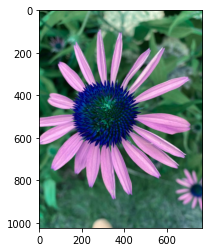

In [ ]:
plt.imshow(img)


In [ ]:
new_im

array([[149, 145, 143, ..., 144, 144, 147],
       [141, 139, 137, ..., 139, 139, 141],
       [123, 122, 120, ..., 138, 138, 140],
       ...,
       [ 98, 101, 108, ..., 153, 156, 155],
       [102, 103, 108, ..., 157, 158, 162],
       [105, 102, 105, ..., 157, 162, 162]], dtype=uint8)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from matplotlib import pyplot as plt

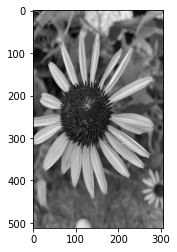

In [ ]:
plt.imshow(new_im, cmap=plt.cm.gray)

In [ ]:
# create a 2D-gaussian kernel、filter with the same size of the image
kernel = np.outer(signal.gaussian(new_im.shape[0], 5), signal.gaussian(new_im.shape[1], 5))# outer product of two vectors,
#each representing a 1D Gaussian window of size of 5 points

# find Fourier transform of the image f(x,y)
freq = fft2(new_im)
# generate a kernel whose origin is in the top-left corner
kern=ifftshift(kernel) # h(x,y)
# calculate FFT of the kernel
freq_kernel = fft2(kern)
# multiply in the frequency domain
product = freq*freq_kernel
# compute the final result
# take the inverse transform of the product and display the real part
im_out = ifft2(product).real # output blurred image

In [ ]:
# scale image to original grey-level intensities in the range from 0 to 255
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out)
im_out= scaler.transform(im_out)
im_out

array([[209.21821745, 184.86644121, 165.37982525, ..., 242.4427332 ,
        248.64161634, 239.27042983],
       [204.79792409, 179.86448826, 159.95816487, ..., 241.2517438 ,
        246.18515008, 235.60426733],
       [200.28787393, 174.68206454, 154.28160015, ..., 240.23249048,
        243.83829112, 231.95116231],
       ...,
       [219.17814257, 196.09811123, 177.50732748, ..., 244.97773798,
        254.13794212, 247.53961616],
       [216.59019013, 193.15215103, 174.31065878, ..., 244.46015744,
        252.80021055, 245.43177197],
       [213.22684574, 189.36995229, 170.23454047, ..., 243.57382655,
        250.92085701, 242.62706336]])

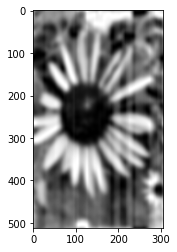

In [ ]:
plt.imshow(im_out, cmap=plt.cm.gray)

I think that this image is a little more clearer in detail, comparing to the 5x5, where less blur is outputted


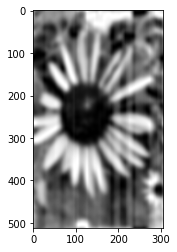

In [ ]:
# 3-pixel Gaussian kernel
imshow(im_out, cmap='gray')
print('I think that this image is a little more clearer in detail, comparing to the 5x5, where less blur is outputted')

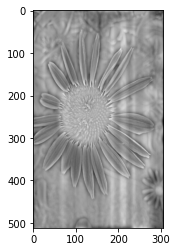

In [ ]:
# high-pass Gaussian filtered image is found by subtracting low-pass filtered image from the original one
imshow(new_im-im_out, cmap='gray')